In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/kaggle/input/tienda-zapatos/ventas_zapateria.csv


In [2]:
ventas = pd.read_csv('/kaggle/input/tienda-zapatos/ventas_zapateria.csv')


In [3]:
ventas.head(5)

,id_venta,producto,cliente,edad,precio,fecha,sucursal
0,1,Zapato de Tacón,Daniel Smith,58,188.65,2024-01-01,Sucursal Oeste
1,2,Bota,Ariel Cole,57,184.11,2024-08-06,Sucursal Este
2,3,Zapato Deportivo,Michael Bond,48,130.66,2024-04-20,Sucursal Sur
3,4,Zapatilla,Lucas Martinez,44,159.77,2024-08-25,Sucursal Este
4,5,Sandalia,Kayla Blair,69,58.97,2024-08-04,Sucursal Norte


In [4]:
 ventas.tail(5)

,id_venta,producto,cliente,edad,precio,fecha,sucursal
45,46,Bota,Mckenzie Blair,39,195.75,2024-03-05,Sucursal Oeste
46,47,Sandalia,Nancy Nelson,40,191.38,2024-06-08,Sucursal Norte
47,48,Zapato Deportivo,Jonathan Guzman,45,191.89,2024-04-02,Sucursal Norte
48,49,Bota,Cindy Sanchez,45,134.25,2024-03-23,Sucursal Norte
49,50,Zapatilla,Megan Brown,44,176.74,2024-03-25,Sucursal Este


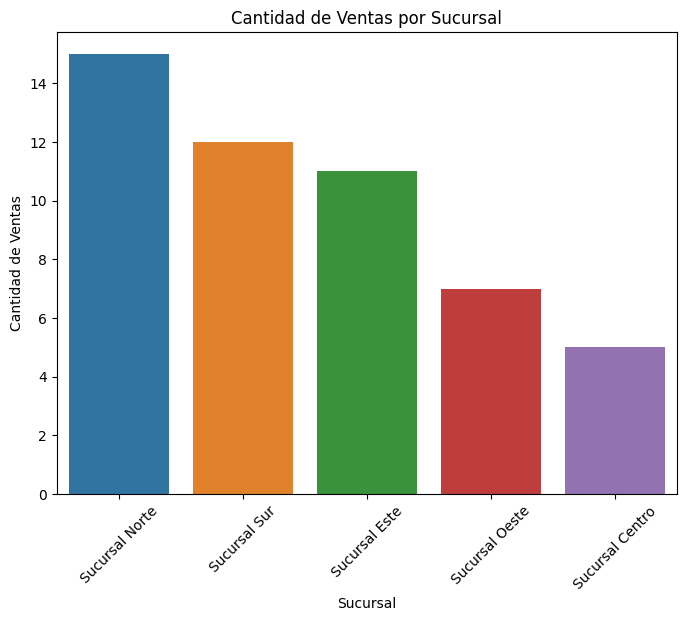

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar ventas por sucursal
ventas_sucursal = ventas['sucursal' ].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=ventas_sucursal.index, y=ventas_sucursal.values)
plt. title('Cantidad de Ventas por Sucursal')
plt.xlabel('Sucursal' )
plt.ylabel('Cantidad de Ventas' )
plt.xticks(rotation=45) # Si los nombres de las sucursales son largos
plt.show()

In [6]:

ventas_ordenadas = ventas.sort_values(by='precio')

# Obtener los primeros 5 por precio (precios más bajos)
primeros_5 = ventas_ordenadas.head(5)

# Obtener los últimos 5 por precio (precios más altos)
ultimos_5 = ventas_ordenadas.tail(5)

print("Primeros 5 por precio:")
print(primeros_5)

print("\nÚltimos 5 por precio:")
print(ultimos_5)

Primeros 5 por precio:
    id_venta         producto            cliente  edad  precio       fecha  \
21        22          Mocasín    Barbara Johnson    23   24.93  2024-08-13   
13        14    Zapato Formal         Carl Smith    47   26.73  2024-03-07   
11        12  Zapato de Tacón        Alan Medina    30   27.41  2024-03-08   
27        28        Zapatilla       Jason Campos    50   31.57  2024-02-22   
9         10          Mocasín  Christopher Lynch    62   34.64  2024-07-22   

          sucursal  
21  Sucursal Norte  
13  Sucursal Norte  
11  Sucursal Norte  
27  Sucursal Norte  
9     Sucursal Sur  

Últimos 5 por precio:
    id_venta          producto           cliente  edad  precio       fecha  \
0          1   Zapato de Tacón      Daniel Smith    58  188.65  2024-01-01   
44        45         Zapatilla  Frederick Vargas    18  189.04  2024-07-29   
46        47          Sandalia      Nancy Nelson    40  191.38  2024-06-08   
47        48  Zapato Deportivo   Jonathan Guzma

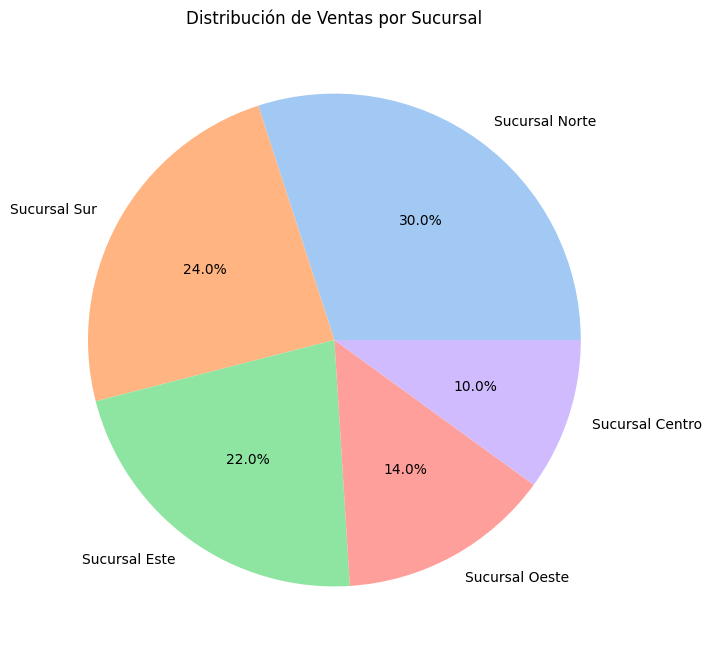

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Contar ventas por sucursal
csv_path= "/kaggle/input/tienda-zapatos/ventas_zapateria.csv"
ventas_sucursal = ventas['sucursal'].value_counts()

# Gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(ventas_sucursal.values, labels=ventas_sucursal.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribución de Ventas por Sucursal')
plt.show()

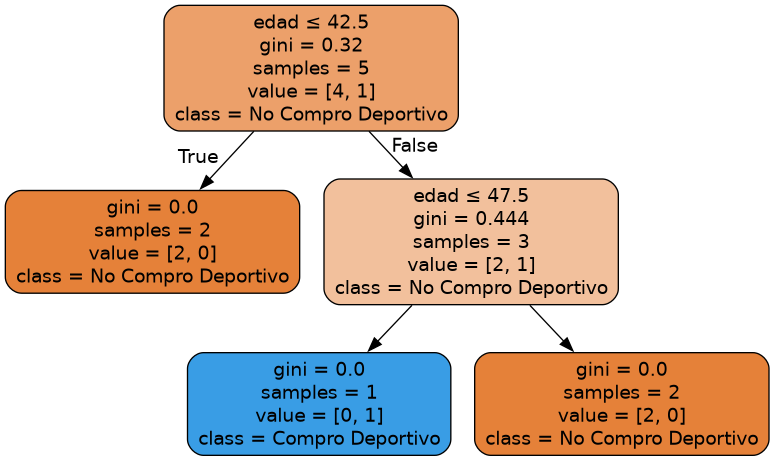

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from IPython.display import Image, display

# Crear un DataFrame ficticio
data = {
    'edad': [25, 32, 45, 50, 23, 36, 40, 60],
    'producto': ['Deportivo', 'Casual', 'Deportivo', 'Elegante', 'Casual', 'Deportivo', 'Elegante', 'Casual']
}
zapateria_data = pd.DataFrame(data)

# Crear una columna binaria para indicar si el producto es un zapato deportivo
zapateria_data['compró_zapatos_deportivos'] = zapateria_data['producto'].apply(lambda x: 1 if 'deportivo' in x.lower() else 0)

# Seleccionar las columnas relevantes
X = zapateria_data[['edad']]  # Características
y = zapateria_data['compró_zapatos_deportivos']  # Etiqueta

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Generar el gráfico del árbol
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['edad'],
                                class_names=['No Compro Deportivo', 'Compro Deportivo'],
                                filled=True, rounded=True,
                                special_characters=True)

# Crear el objeto de visualización
graph = graphviz.Source(dot_data)

# Guardar el gráfico como PNG
graph.format = 'png'
graph.render('arbol_decision_edad')  # Guarda el gráfico como PNG en el directorio de trabajo

# Mostrar el gráfico PNG
display(Image(filename='arbol_decision_edad.png'))
